Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT to DTFT Interpolation with the Periodic Sinc Function**,
Winter Semester 2020/21 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft
from scipy.special import diric

# DFT to DTFT Interpolation with the Periodic Sinc Function

The DFT spectrum $X[\mu]$ can be interpolated towards the DTFT spectrum $X(\Omega)$ with

\begin{equation}
X(\Omega)=\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{-\mathrm{j}\frac{\left(\Omega-\frac{2\pi}{N}\mu\right)(N-1)}{2}}\cdot\text{psinc}_N\left(\Omega-\frac{2\pi}{N}\mu\right).
\end{equation}

This interpolation implies:
- the DFT $X[\mu]$ stems from a signal $x[k]$ for which periodicity of $N$ is inherent, we assume the first period at $0\leq k\leq N-1$ 
- the DFT spectrum is discrete and $N$ periodic
- the DTFT spectrum stems from the signal $x[k]$ for $0\leq k\leq N-1$, for all other $k$ is $x[k]=0$, i.e. considering only one period
- the DTFT spectrum is continuous and $2\pi$ periodic, which means that the signal $x[k]$ can not be periodic

The interpolation kernel utilises the so-called **periodic sinc function**

\begin{align}
\text{psinc}_N(\Omega)=\begin{cases}\frac{1}{N}\cdot\frac{\sin\left(\frac{N}{2}\Omega\right)}{\sin\left(\frac{1}{2}\Omega\right)}&\text{for }\Omega\neq2\pi m\\
(-1)^{m(N-1)}&\text{for }\Omega=2\pi m\end{cases},\,\,m\in\mathbb{Z},
\end{align}

which is also known as aliased sinc and Dirichlet function.

Below, we give an example graph for $\text{psinc}_N(\Omega)$.
Note that the orange dots indicate the DFT eigenfrequencies.

In [2]:
def dft2dtft(X, W):
    N = len(X)
    Xi = np.zeros(len(W), dtype='complex')
    for i, Omega in enumerate(W):
        for mu_dft in range(N):
            Xi[i] += X[mu_dft] *\
                np.exp(-1j/2*(Omega - 2*np.pi/N*mu_dft)*(N-1)) *\
                diric(Omega - 2*np.pi/N*mu_dft, N)
    return Xi

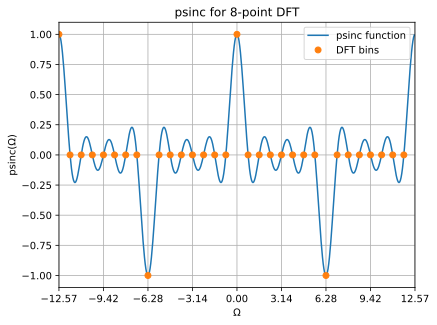

In [3]:
K = 3
N_DFT = 2**K
Omega_DFT = np.arange(-2*N_DFT, 2*N_DFT) * 2*np.pi/N_DFT
N = 2**(K+4)
Omega = np.arange(-2*N, 2*N) * 2*np.pi/N
psinc_DFT = diric(Omega_DFT, N_DFT)
psinc = diric(Omega, N_DFT)

plt.plot(Omega, psinc, label='psinc function')
plt.plot(Omega_DFT, psinc_DFT, 'o', label='DFT bins')
plt.xlim(-4*np.pi, 4*np.pi)
plt.xticks(np.arange(-4, 5, 1)*np.pi)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'psinc($\Omega$)')
plt.title('psinc for '+str(N_DFT)+'-point DFT')
plt.legend()
plt.grid(True)

## Task: DFT Analysis Using a Rectangular Window

A complex signal

- $x[k]=\mathrm{exp}(\mathrm{j}(\Omega k + \frac{\pi}{\pi}))$ with
- $\Omega=4\cdot\frac{2\pi}{N}$, 
- $N=8$

is to be analysed with the DFT 
\begin{align}
X[\mu]=\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}
for $0\leq k \leq N-1$.

Furthermore, assume that $x[k]$ results from continuous-time signal $x(t)$ using sampling frequency of $f_s=10$ Hz.

1. Plot the discrete-time signals that correspond to the DFT and the DTFT spectrum.

2. Calculate the DFT spectrum $X[\mu]$ of $x[k]$ and visualise the real and imaginary part as well as the magnitude and the phase of $X[\mu]$ over $0\leq\mu\leq N-1$.

3. Implement the above mentioned interpolation towards the DTFT and visualise the resulting magnitude spectra $|X[\mu]|$, $|X(\Omega)|$ over frequency axes $\mu$, $\Omega$ as well as the physical frequency $f$.

## Task 1: Generate Signal and Plot

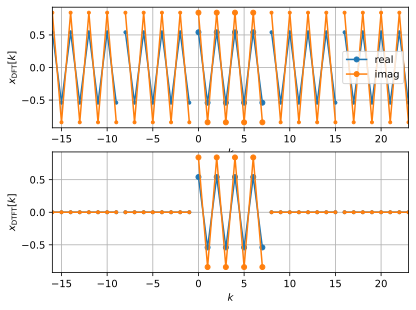

In [4]:
N = 8

Om = 4 * 2*np.pi/N  # play with the factor 4

k = np.arange(N)
x = np.exp(1j*(Om*k+1))  # pi/pi=1

koffs = [-2, -1, 1, 2]
plt.subplot(2, 1, 1)
plt.plot(k, x.real, 'C0o-', label='real', ms=5)
plt.plot(k, x.imag, 'C1o-', label='imag', ms=5)
# the DFT spectrum corresponds to a periodic signal of period N
# we exemplarily indicate this
for koffsi in koffs:
    plt.plot(k+koffsi*N, x.real, 'C0o-', ms=3)
    plt.plot(k+koffsi*N, x.imag, 'C1o-', ms=3)
plt.xlim(koffs[0]*N, koffs[-1]*N+N-1)
plt.xlabel(r'$k$')
plt.ylabel(r'$x_\mathrm{DFT}[k]$')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(k, x.real, 'C0o-', ms=5)
plt.plot(k, x.imag, 'C1o-', ms=5)
# the DTFT spectrum corresponds to singular event of length N for k=0...N-1
# we exemplarily indicate this
for koffsi in koffs:
    plt.plot(k+koffsi*N, 0*x.real, 'C0o-', ms=3)
    plt.plot(k+koffsi*N, 0*x.imag, 'C1o-', ms=3)
plt.xlim(koffs[0]*N, koffs[-1]*N+N-1)
plt.xlabel(r'$k$')
plt.ylabel(r'$x_\mathrm{DTFT}[k]$')
plt.grid(True)

## Task 2: DFT and Plot

In [5]:
mu = np.arange(N)
w = np.ones(N)

# optional playground for windowing
# see dft_windowing_tutorial.pdf for the equations of these windows
# note that the scipy.signal.windows with same name behave different !
# thus standardised names does NOT imply standardised characteristics
if False:
    # Hann, two unused zeros
    w = (1 - np.cos(2*np.pi/N*(k+1/2))) / 2 
    # Hamming, put notch into first sidelobe, thus all zeros used
    w = 0.54 - 0.46 * np.cos(2*np.pi/N*(k+1/2))

X = fft(x*w)

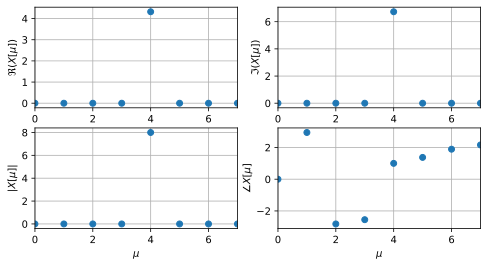

In [6]:
plt.figure(figsize=(8, 4))

plt.subplot(2, 2, 1)
plt.plot(mu, np.real(X), 'o')
plt.xlim(0, N-1)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\Re(X[\mu])$')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(mu, np.imag(X), 'o')
plt.xlim(0, N-1)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\Im(X[\mu])$')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(mu, np.abs(X), 'o')
plt.xlim(0, N-1)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X[\mu]|$')
plt.grid(True)

# note that only the phase at mu=4 is a meaningful result (=1)
# all other values are due to numerical noise / trash
# since Re and Im are approx zero at these mu
plt.subplot(2, 2, 4)
plt.plot(mu, np.angle(X), 'o')
plt.xlim(0, N-1)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\angle X[\mu]$')
plt.grid(True)

## Task 3: DFT -> DTFT Interpolation, Plot

<ipython-input-1-bde6389fc554>:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot(mu, 20*np.log10(np.abs(X)), 'C0o', label='DFT')
<ipython-input-1-bde6389fc554>:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(2*np.pi/N*mu, 20*np.log10(np.abs(X)), 'C0o', label='DFT')
<ipython-input-1-bde6389fc554>:49: RuntimeWarning: divide by zero encountered in log10
  plt.plot(mu*fs/N, 20*np.log10(np.abs(X)), 'C0o', label='DFT')


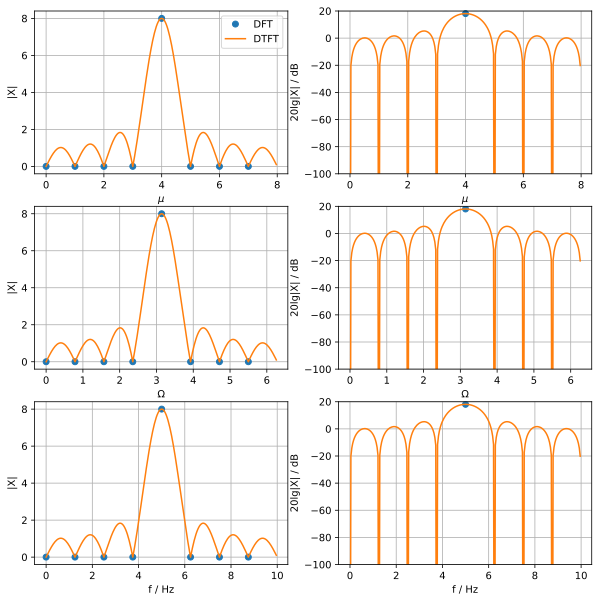

In [7]:
fs = 10
Ni = 2**8
W = np.arange(Ni) * 2*np.pi/Ni  # Omega for which to interpolate to DTFT
f = W / (2*np.pi) * fs  # physical frequency based on W using fs
mui = W / (2*np.pi) * N  # frequency vector normalized to integer frequencies
Xi = dft2dtft(X, W)  # DTFT interpolation from DFT

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.plot(mu, np.abs(X), 'C0o', label='DFT')
plt.plot(mui, np.abs(Xi), 'C1-', label='DTFT')
plt.xlabel(r'$\mu$')
plt.ylabel('|X|')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(mu, 20*np.log10(np.abs(X)), 'C0o', label='DFT')
plt.plot(mui, 20*np.log10(np.abs(Xi)), 'C1-', label='DTFT')
plt.ylim(-100, 20)
plt.xlabel(r'$\mu$')
plt.ylabel('20lg|X| / dB')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(2*np.pi/N*mu, np.abs(X), 'C0o', label='DFT')
plt.plot(W, np.abs(Xi), 'C1-', label='DTFT')
plt.xlabel(r'$\Omega$')
plt.ylabel('|X|')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(2*np.pi/N*mu, 20*np.log10(np.abs(X)), 'C0o', label='DFT')
plt.plot(W, 20*np.log10(np.abs(Xi)), 'C1-', label='DTFT')
plt.ylim(-100, 20)
plt.xlabel(r'$\Omega$')
plt.ylabel('20lg|X| / dB')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(mu*fs/N, np.abs(X), 'C0o', label='DFT')
plt.plot(f, np.abs(Xi), 'C1-', label='DTFT')
plt.xlabel(r'f / Hz')
plt.ylabel('|X|')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(mu*fs/N, 20*np.log10(np.abs(X)), 'C0o', label='DFT')
plt.plot(f, 20*np.log10(np.abs(Xi)), 'C1-', label='DTFT')
plt.ylim(-100, 20)
plt.xlabel(r'f / Hz')
plt.ylabel('20lg|X| / dB')
plt.grid(True)

We observe that 7 of 8 DFT coeefficients are precisely zero, and only $|X[\mu=4]|=8$. This is intentional and is expected for the chosen signal that oscillates with exactly a DFT eigenfrequency, here half of the sampling frequency.

The code above allows for two more playgrounds:

- We might change $\Omega=1\cdot\frac{2\pi}{N}$, $\Omega=2\cdot\frac{2\pi}{N}$, $\Omega=3\cdot\frac{2\pi}{N}$
and observe how the spectrum moves around the frequency axis, however the shape is preserved.
The main lobe precisely corresponds to the chosen $\mu$.

- We might change $\Omega=1.5\cdot\frac{2\pi}{N}$, $\Omega=2.5\cdot\frac{2\pi}{N}$, $\Omega=3.5\cdot\frac{2\pi}{N}$
and observe that - since these frequencies are **no** DFT eigenfrequencies - now all DFT coefficients exhibit energy. This suggests frequencies in the signal which are actually not there, but originate from cutting the signal to the chosen block size $N$. The effect is known as **leakage effect**.

- In task 2 we might optionally apply a window to the signal. The plots for task 3 then reveal how the leakage effect is reduced but the main lobe gets broader.
Since we have chosen a mono-frequent, complex oscillation as input signal to the DFT / DTFT, the actual window spectrum can be directly seen in the plots.

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises